## Import Library

In [1]:
# Install rdkit

def install_rdkit():
  !wget -c https://repo.continuum.io/miniconda/Miniconda3-latest-Linux-x86_64.sh
  !chmod +x Miniconda3-latest-Linux-x86_64.sh
  !time bash ./Miniconda3-latest-Linux-x86_64.sh -b -f -p /usr/local
  !time conda install -q -y -c conda-forge rdkit

# install_rdkit()

In [2]:
# Data

#from google.colab import files
import pandas as pd
import numpy as np
import regex as re

# rdkit
import sys
#sys.path.append('/usr/local/lib/python3.7/site-packages/')
from rdkit import Chem
from rdkit.Chem import DataStructs

# random
import random as rd

import math

RDKit WARNING: [21:54:55] Enabling RDKit 2019.09.1 jupyter extensions


## Data

### Pre-Processing Data

In [3]:
def preprocessing_data(link_of_data) :
  dataset = pd.read_csv(link_of_data,sep=";")
  dataset = dataset.iloc[:,[0,7,9,10,11]]

  sameMol = []
  sameMolCount = {}
  dataset_handle = []

  for x in dataset.values:
    mol_name = x[0]
    if mol_name in sameMol:
      print("uye")
      x[0] = mol_name+"("+str(sameMolCount[mol_name])+")"
      sameMolCount[mol_name] += 1
    else:
      sameMol.append(x[0])
      sameMolCount[mol_name] = 1
    dataset_handle.append(x)

  #print(dataset_handle)
    
  list_of_column_dataframe = dataset.columns
  list_of_dataset_after = []

  list_of_dataset_before = np.array(dataset_handle)
  
  for data in list_of_dataset_before :
    if data[2] == "'='" :
      if data[4] == "nM" :
        if data[3] < 10000 :
          data[3] = data[3]/1000
          list_of_dataset_after.append(data)
  
  dataframe_of_dataset_after = pd.DataFrame(list_of_dataset_after)
  dataframe_of_dataset_after.columns = list_of_column_dataframe
  name_of_file_download = "Dataset_After.csv"
  dataframe_of_dataset_after.to_csv(name_of_file_download)
  #files.download(name_of_file_download)
  return dataframe_of_dataset_after




In [4]:
#preprocessing_data("https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_Before.csv")

### Data After Pre-Processing

In [5]:
# for colab

#dataset = pd.read_csv('https://raw.githubusercontent.com/relfarizi/Final_Project/master/Data/Dataset_After.csv', index_col= 0)


dataset = pd.read_csv('Dataset_After.csv',index_col = 0)
dataset.head(5)

,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM


In [6]:
#dataset = dataset.drop_duplicates(keep=False,inplace=True)
dataset = dataset.dropna()
mol_smiles = dataset.iloc[:,1].values.tolist()
row_drop = []
for i in range(len(mol_smiles)) :
  #print(mol_smiles[i])
  if len(str(mol_smiles[i])) < 5 :
    row_drop.append(i)
print(row_drop)
dataset.drop(row_drop)
#dataset = dataset.iloc[:500,:]

[]


,Molecule ChEMBL ID,Smiles,Standard Relation,Standard Value,Standard Units
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,'=',0.7200,nM
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,'=',3.3100,nM
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',5.0501,nM
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.5400,nM
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,'=',0.6200,nM
...,...,...,...,...,...
1855,CHEMBL1782241,CC(C)=CCC/C(C)=C/Cc1c(O)c(CC=C(C)C)c(O)c2c(=O)...,'=',5.2000,nM
1856,CHEMBL323197,COc1c(O)cc2oc3cc(O)c(CC=C(C)C)c(O)c3c(=O)c2c1C...,'=',5.5000,nM
1857,CHEMBL4071698,CCCc1cc(O)cc(OC(=O)c2c(O)cc(O)cc2CCC)c1,'=',0.7200,nM
1858,CHEMBL3770020,CCCc1cc(O)cc(O)c1C(=O)O,'=',1.5800,nM


In [7]:
#dataset.to_csv("Dataset.csv")

## Probability Activity

### 1. Molecule Activity
Untuk mencari jumlah dari nilai aktivitas masing2 molekul

variabel yang digunakan :
* mol_name = list nama molekul
* mol_smile = list smile molekul
* mol_act = list berisi nilai IC50
* act = nilai aktivitas tiap molekul
* sum_act = Nilai jumlah dari a

In [8]:
mol_name = dataset.iloc[:,0].values.tolist()
mol_smiles = dataset.iloc[:,1].values.tolist()
mol_act = dataset.iloc[:,3].values.tolist()
sum_act = 0
for molekul in mol_act :
  act = np.exp(-molekul)
  sum_act  += act
print(sum_act)

616.3006027743246


### 2. Probability Succes


Mencari nilai probabilitas kesuksesan untuk setiap molekul

Variabel yang digunakan :
* n = banyaknya molekul
* mol_prob = list probabilitas setiap molekul
* act = nilai aktivitas molekul
* prob = nilai probabilitas kesuksesan molekul
* sum_pro = nilai jumlah dari Probabiliras Kesuksesan




In [9]:
n = len(mol_act)
#p_avg = 1/n
mol_prob = []

# act = probabilitas kesuksesan

sum_pro = 0
for molekul in mol_act :
  #act = (molekul[1]*p_avg*n)/sum_act
  act = np.exp(-molekul)
  prob = act/sum_act
  prob = round(prob,8)
  mol_prob.append(prob)
  sum_pro += prob
print(sum_pro)


0.9999999799999977


## Cost (Trial)

Menentukan cost dari setiap molekul. cell ini baru coba di-generate hanya dengan mengalikan dengan sum_of_cost dengan probability kesuksesannya. sehingga nilai probabilitas terbesar diasumsikan memiliki cost yang besar pula

In [10]:
sum_of_cost = 500000
mol_cost = []
sum_cost = 0
for mol in mol_prob:
    cost = mol*sum_of_cost
    mol_cost.append(round(cost,4))
    sum_cost += cost
print(sum_cost)

499999.99000000075


## Fingerprint

berisi bit biner dari sifat yang menggambarkan suatu molekul (baca lagi)

Variabel yang digunakan :
* fingerprint suatu molekul (dalam bit biner)
* mol_fp = list dari fingerprint setiap molekul


In [11]:
mol_fp = []
for molekul in mol_smiles :
  smiles = Chem.MolFromSmiles(str(molekul))
  fp = Chem.RDKFingerprint(smiles)
  mol_fp.append(fp)

## To DataFrame

In [12]:
#df_mol = pd.DataFrame.from_dict(mol_act_dict, orient='index')
#df_mol.columns = ["IC50","Molecule Activity", "Probability Activity"]
#df_mol.sort_values(by=["IC50"], ascending=False)
#mol_name = pd.Series(mol_name)
#mol_act = pd.Series(mol_act)
#df_mol = pd.concat(mol_name,mol_act)
#print(len(mol_name))
#print(len(mol_smiles))
#print(len(mol_fp))
#print(len(mol_act))
#print(len(mol_prob))

df = pd.DataFrame({'mol_name':mol_name,
                       'mol_smiles' : mol_smiles,
                       'mol_act':mol_act,
                       'mol_fp' : mol_fp,
                       'mol_prob' : mol_prob,
                       'mol_cost' : mol_cost
                       })

df.head()

,mol_name,mol_smiles,mol_act,mol_fp,mol_prob,mol_cost
0,CHEMBL2263120,CC1(C)CC[C@]2(C(=O)OCCCCCCCCCCC(=O)O)CC[C@]3(C...,0.7200,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.000790,394.900
1,CHEMBL2263121,CC1(C)CC[C@]2(C(=O)NC(Cc3ccccc3)C(=O)O)CC[C@]3...,3.3100,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...",0.000059,29.625
2,CHEMBL168,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,5.0501,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.000010,5.200
3,CHEMBL508831,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.5400,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",0.000946,472.780
4,CHEMBL506556,CC1(C)CC[C@]2(C(=O)O)CC[C@]3(C)C(=CC[C@@H]4[C@...,0.6200,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...",0.000873,436.430


In [13]:
df_mol = df.iloc[:,[0,2,3,5]]
df_mol

,mol_name,mol_act,mol_fp,mol_cost
0,CHEMBL2263120,0.7200,"[0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",394.900
1,CHEMBL2263121,3.3100,"[0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, ...",29.625
2,CHEMBL168,5.0501,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",5.200
3,CHEMBL508831,0.5400,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, ...",472.780
4,CHEMBL506556,0.6200,"[0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, ...",436.430
...,...,...,...,...
1847,CHEMBL1782241,5.2000,"[0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, ...",4.475
1848,CHEMBL323197,5.5000,"[1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, ...",3.315
1849,CHEMBL4071698,0.7200,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",394.900
1850,CHEMBL3770020,1.5800,"[1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, ...",167.105


## Individu
suatu fungsi yang bertujuan untuk me-return dari suatu populasi (kumpulan individu berdasarkan subset yang diberikan). 

return :
* mol_name
* rata-rata dari act
* rata-rata dari mol_fp

cara menyari diversity :

dengan menghitung semua similarity antar molekul kemudian hasilnya di rata2kan

sebagai contoh :

ada 3 (subset) molekul (A,B,C), maka menghitungnya

* A -> B
* A -> C
* B -> C

kemudian dirata2kan

In [14]:
dictDup = {}
for x in df_mol["mol_name"]:
    if x in dictDup.keys() :
        dictDup[i] += 1
    else :
        dictDup[i] = 1
print("sumDup")

for i in dictDup :
    if dictDup[i] > 1 :
        print(i,dictDup[i])

sumDup


In [90]:
# checked


def isDupInd(individu,population,dfMol = df_mol) :
    same = False
    molName = dfMol["mol_name"]
    molNameList = []
    for gen in individu :
        molNameList.append(gen)
    individu = molNameList
    sizeList = len(individu)
    #print(sizeList)
    count = 0
    for ind in population :
        ind = ind[0]
        for gen in individu :
            if gen in ind :
                count += 1
        
        if count == sizeList :
            #print(count)
            #print("masuk")
            same = True
            break
        else :
            count = 0
    return same
pop=population[1]
#print(pop)
pop = ['CHEMBL197884', 'CHEMBL3238195', 'cek', 'CHEMBL208985', 'CHEMBL252710', 'CHEMBL280388', 'CHEMBL9321(1)', 'CHEMBL1783782', 'CHEMBL393682', 'CHEMBL2263121', 'CHEMBL267022', 'CHEMBL57157', 'CHEMBL4214309', 'CHEMBL9070(1)', 'CHEMBL253269', 'CHEMBL1935610', 'CHEMBL515146', 'CHEMBL246454', 'CHEMBL1766712', 'CHEMBL263348', 'CHEMBL4067159', 'CHEMBL578429', 'CHEMBL1085070(1)', 'CHEMBL3238201', 'CHEMBL4288744', 'CHEMBL52290', 'CHEMBL2263121(1)', 'CHEMBL1164828', 'CHEMBL1240534', 'CHEMBL169(22)', 'CHEMBL565795', 'CHEMBL1242552', 'CHEMBL2436037', 'CHEMBL2262830(1)', 'CHEMBL2263114', 'CHEMBL1086226', 'CHEMBL210837', 'CHEMBL2436032', 'CHEMBL1650892', 'CHEMBL266753(1)', 'CHEMBL190535', 'CHEMBL395156', 'CHEMBL3219582', 'CHEMBL1779053', 'CHEMBL445491', 'CHEMBL451520', 'CHEMBL3758490', 'CHEMBL1086228(1)', 'CHEMBL300119', 'CHEMBL4069413', 'CHEMBL2262832(1)', 'CHEMBL1163827', 'CHEMBL437964(2)', 'CHEMBL1778902', 'CHEMBL2424711(1)', 'CHEMBL1163236', 'CHEMBL557450', 'CHEMBL7152', 'CHEMBL3310429', 'CHEMBL3786595', 'CHEMBL24843(1)', 'CHEMBL25558', 'CHEMBL211369(1)', 'CHEMBL1086230', 'CHEMBL4066472', 'CHEMBL4095230', 'CHEMBL371929', 'CHEMBL426373', 'CHEMBL523885', 'CHEMBL1778901', 'CHEMBL323712', 'CHEMBL2087688', 'CHEMBL403117', 'CHEMBL4086351', 'CHEMBL1823960', 'CHEMBL2349151', 'CHEMBL279242', 'CHEMBL298849', 'CHEMBL1778913', 'CHEMBL246870', 'CHEMBL2424709(1)', 'CHEMBL370584', 'CHEMBL24141', 'CHEMBL57036', 'CHEMBL377905', 'CHEMBL83179', 'CHEMBL403746', 'CHEMBL25628', 'CHEMBL3098944', 'CHEMBL169(2)', 'CHEMBL2087690', 'CHEMBL110642', 'CHEMBL506260', 'CHEMBL2373418', 'CHEMBL1242736', 'CHEMBL378992', 'CHEMBL3633139', 'CHEMBL2208256', 'CHEMBL117869(1)', 'CHEMBL2205521']
#print(pop)
#print(population[0])
isDupInd(pop,population)

False

In [16]:
n_subset = 5

def bundleIndividu(individu,dfMol = df_mol):
    #subset = np.array(subset.values.tolist())
    #print((individu))
    molName = dfMol["mol_name"].tolist()
    molAct = dfMol["mol_act"].tolist()
    molFp = dfMol["mol_fp"].tolist()
    #print(mol_name)
    #print(mol_act)
    #print(mol_fp[1])

    #cek duplicate
    """
    sumDup = 0
    listDup = []
    dictDup = {}
    for i in individu :
        if i in dictDup.keys() :
            dictDup[i] += 1
        else :
            dictDup[i] = 1
    print("sumDup")
    

    for i in dictDup :
        if dictDup[i] > 1 :
            print(i,dictDup[i])
    """
    bitString = []
    sumBit = 0
    #print("ind",(individu))
    for mol in molName:
        #print("mol",mol)
        if mol in individu :
            bit = 1
            sumBit+=1
        else :
            bit = 0
        bitString.append(bit)
    #print("bitstring" ,sumBit)
    fp_list = []
    n = len(molName)

    def fObjective(individu = individu,dfMol = df_mol) :
    
        def fObj1(individu = individu,dfMol = dfMol) :
            act = []
            for idx,x in enumerate(molName) :
                if x  in individu :
                    act.append(dfMol["mol_act"][idx])
            #print(np.mean(act))
            return np.mean(act)
        
        def fObj2(individu = individu, dfMol = dfMol) :
            fpList = []
            
            #print(n)
            molFp = []
            
            for idx,x in enumerate(molName) :
                if x in individu :
                    molFp.append(dfMol["mol_fp"][idx])
            n = len(molFp)
            for i in range(n):
                for j in range(n):
                    if i > j :
                        tmpFp = DataStructs.FingerprintSimilarity(molFp[i],molFp[j])
                        fpList.append(tmpFp)
            #print("fplist",fpList)
            return 1/(np.mean(fpList))

        return fObj1(), fObj2()

    fObj1,fObj2 = fObjective()
    
    if [individu,fObj1,fObj2] is not None :
        return [individu,fObj1,fObj2]
    else :
        return []
#print(bundleIndividu(population[0][0]))


### NSGA-II

## Inisialisasi populasi bit string

In [80]:

def initPopulation(nPortfolio,nGen,dfMol=df_mol):
    def initIndividu(dfMol = df_mol,nGen=nGen):
        randIndividu = []
        while(len(randIndividu) < nGen) :
            gen = rd.randint(0,len(dfMol)-1)
            if gen not in randIndividu:
                randIndividu.append(gen)
        return randIndividu

    molName = dfMol["mol_name"].tolist()
    #print(len(molName))
    molAct = dfMol["mol_act"].tolist()
    molFp = dfMol["mol_fp"].tolist()
    #print(molFp)
    population = []
    
    nSubset = dfMol.shape[0]
    #print(nPortfolio)

    for i in range(nPortfolio) :
        #randIndividu = [rd.randint(0,len(df_mol)-1) for i in range(nGen)]
        #print(len(randIndividu))
        randIndividu = initIndividu()

        if i > 0 :
            while(isDupInd(randIndividu,population)) :
                randIndividu = initIndividu()
        #print(randIndividu)

        molNameList = []
        for j in randIndividu :
            molNameList.append(molName[j])
        #print(len(molNameList))        
        individu = molNameList
        bInd = bundleIndividu(individu)
        #print(bInd)
        #bitString = bInd[0]
        population.append(bInd)
    return population
        

population=((initPopulation(10,100)))
print(len(population[2][0]))

100


## cek duplikat

In [18]:
def duplicate(individu) :
    dupInd = {}
    individu = individu[0]
    #print(population)
    dupMol = {}
    for mol in individu :
        #print(mol)
        if mol in dupMol.keys() :
            dupMol[mol] += 1
        else :
            dupMol[mol] = 1

    listDup = {}
    for mol in dupMol :
        if (dupMol[mol]) > 1 :
            listDup[mol] = dupMol[mol]
    print("individu", end =" ")
    if len(listDup) > 0 :
        print(listDup)
    else :
        print("Non Duplicate")

duplicate([[1,2,2,2],0,0])
         


individu {2: 3}


In [20]:
for ind in population :
    duplicate(ind)

individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate
individu Non Duplicate


In [22]:
def unpackInd(population) :
    fMaxObj1 = []
    fMaxObj2 = []
    solution = []
    for idx,individu in enumerate(population) :
        #print(idx)
        solution.append(individu[0])
        fMaxObj1.append(individu[1]) # Probabilitas Kesuksesan
        fMaxObj2.append(individu[2]) # Diversity   
    return [solution,fMaxObj1,fMaxObj2]

In [23]:
def duplicateInd(population) :
    population = unpackInd(population)[0]
    def isSame(ind1,ind2):
        same = False
        sizeList = len(ind1)
        count = 0
        for i in ind1 :
            if i in ind2 :
                count += 1
        
        if count == sizeList:
            same = True
        return same

    count = 0
    sameInd = []
    for i in range(len(population)) :
        for j in range(len(population)) :
            if i > j :
                if isSame(population[i],population[j]) :
                    count+=1
                    sameInd.append([population[i],population[j]])
    return count,sameInd

dupInd = duplicateInd(population)
dupInd

(0, [])

#### Generate Offspring ( crossover and mutation )

In [24]:
print(len(population[1][0]))

100


In [106]:
def generateOffspring(population,dfMol = df_mol) :
    sizeOfPop = len(population)

    def duplicateMol(parent) :
        parent1,parent2 = parent
        dupGen = []
        #print("par",len(parent1))
        for gen in parent1 :
            if gen in parent2 :
                dupGen.append(gen)
        return dupGen

    def generateParent(population=population, sizeOfPop = sizeOfPop):
        #sizeOfPop = len(population[0])
        parent1 = population[rd.randint(0,sizeOfPop-1)][0]
        parent2 = population[rd.randint(0,sizeOfPop-1)][0]
        #print("parent1",parent1)
        return [parent1,parent2]

    def crossover(parent,pCo = 0.5) :
       
        randCo = rd.random()
        #print(randCo)
        parents = generateParent()
        parent1,parent2 = (parents)
        dupMol = ((duplicateMol(parents)))
        parent1 = list(set(parent1)-set(dupMol))
        parent2 = list(set(parent2)-set(dupMol))
        #print("parent",parent1)
        #print(parent1)
        nGen = len(parent1)
        #print("nGen",nGen)
        
        nPoint = 0.5
        #barier =(math.floor(len(population[0])*nPoint))
        barier = math.floor(nGen*nPoint) 

        if randCo < pCo :
            offspring1 = parent1[:barier]+parent2[barier:]
            offspring2 = parent2[:barier]+parent1[barier:]
        else :
            offspring1 = parent1
            offspring2 = parent2
        offspring1 += dupMol
        offspring2 += dupMol
        #print("oofspring",offspring1)
        #print("moltobit",sum(molToBit([offspring1,offspring2])[1]))
        return ([offspring1,offspring2])

   # Flip mutation 
    def mutation(individu,pMut = 0.2,pMr = 0.5,dfMol = dfMol) :
        randMut = rd.uniform(0,1)
        #print(randMut)
        newOffspring = []
        if randMut > pMut :
            newInd = []
            molName = [mol for mol in dfMol["mol_name"] if mol not in individu]
            for idx,gen in enumerate(individu) :
                randRep = rd.uniform(0,1)
                if randRep > pMr :
                    newMol = rd.choice(molName)
                    while(newMol in individu) :
                        individu[idx] = rd.choice(molName)
            #individu = newInd


        return individu



    
    # Start Generate
    solution = []
    while(len(solution) < 2*sizeOfPop):
        parents = generateParent()
        #print(parents)
        offSpring = crossover(parents)
        for x in offSpring :
            if len(solution) > 0 :
                #print("x",x)
                
                if not isDupInd(x,solution) :
                    solution.append(bundleIndividu(mutation(x),dfMol))
                else :
                    continue
            else :
                 solution.append(bundleIndividu(mutation(x),dfMol))
        #print(len(solution))
    return solution

genOff = ((generateOffspring(population)))
dupOff = duplicateInd(genOff)[0]
dupOff


0

In [95]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front



In [96]:
#fast_non_dominated_sort(fMaxObj1,fMaxObj2)

In [97]:
import math
def sort_by_values(list1, values):
    sorted_list = []
    while(len(sorted_list)!=len(list1)):
        if index_of(min(values),values) in list1:
            sorted_list.append(index_of(min(values),values))
        values[index_of(min(values),values)] = math.inf
    return sorted_list


In [98]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [99]:
def crowding_distance(values1, values2, front):
    distance = [0 for i in range(0,len(front))]
    #print(distance)
    #print(values2)
    sorted1 = sort_by_values(front, values1[:])
    #print("sorted1",sorted1)
    sorted2 = sort_by_values(front, values2[:])
    
    distance[0] = math.inf
    distance[len(front) - 1] = math.inf
    for k in range(1,len(front)-1):
        #print("k=",k)
        distance[k] = distance[k]+ (values1[sorted1[k+1]] - values2[sorted1[k-1]])/(max(values1)-min(values1))
        
    for k in range(1,len(front)-1):
        distance[k] = distance[k]+ (values1[sorted2[k+1]] - values2[sorted2[k-1]])/(max(values2)-min(values2))
    return distance

In [100]:
def index_of(a,list):
    for i in range(0,len(list)):
        if list[i] == a:
            return i
    return -1

### Coba NSGA

In [101]:
#ls = cSave

def sortByValue(ls) :
    sort = sorted((value,index) for index,value in enumerate(ls))
    sortLs = []
    for x in sort :
        sortLs.append((x[1]))
    return sortLs
#sortByValue(ls)

In [102]:
def elDup(ls,name) :
    dupDict = {}
    for x in ls :
        if x in dupDict :
            dupDict[x] += 1
        else :
            dupDict[x] = 1
    listDupt = {}

    for x in dupDict :
        if dupDict[x] > 1 :
            listDupt[x] = dupDict[x]
            
    print(name,end=" ")
    if len(listDupt) > 0 :
        print(listDupt)
    else :
        print("Non Duplicate")
elDup([1,2,3],"uye")

uye Non Duplicate


In [141]:
maxGen = 150
gen_0 = 0
nGen = 100
nPortfolio = 100 # banyaknya individu dalam satu populasi

population = initPopulation(nPortfolio,nGen)

initFobj1 = unpackInd(population)[1]
initFobj2 = unpackInd(population)[2]

animX = [initFobj1]
animY = [initFobj2]
for x in population :
    #duplicate(x)
    break
for gen in range(maxGen) :
    print("gen", gen)


    # Step 1 Generate Offsprings
   
    offsprings = generateOffspring(population)
    
    # Step 2 assingn nilai fungsi
    fObj1 = unpackInd(offsprings)[1]
    fObj2 = unpackInd(offsprings)[2]
    elDup(fObj1,"fObj1")
    
    # Step 3 Fast Non Dominated
    nonDominatedSorted = fast_non_dominated_sort(fObj1[:],fObj2[:])
    
    # Step 4 crowding distance
    #print(nonDominatedSorted)
    crowdingDistance = []
    for i in range(len(nonDominatedSorted)) :
        crowdingDistance.append(crowding_distance(fObj1[:],fObj2[:],nonDominatedSorted[i][:]))
    

    # Step 5 Individu selection
    newNonDominatedSorted = []
    new_solution = []
    for i in range(0,len(nonDominatedSorted)):    
        # step 5.1 assign sort by index dari crowding distance
        #front22 = sort_by_values([x for x in range(len(crowdingDistance[i][:]))], crowdingDistance[i][:])
        front22 = sortByValue(crowdingDistance[i][:])
        if gen == 1 :
            cSave = crowdingDistance[i][:]
            fSave = front22

        # step 5.2 memasukkan nilai dari non_dominated .. berdasrkan urutan crowding
        front = []
        for j in range(len(nonDominatedSorted[i])):
            front.append(nonDominatedSorted[i][front22[j]])

        # Step 5.3 masukin ke new_sol sesuai dengan keperluan pop_size
        for value in front:
            new_solution.append(value)
            
            if(len(new_solution)==nPortfolio):
                break
                
        if (len(new_solution) == nPortfolio):
            break
    elDup(front22,"front22")
    
    #print(nonDominatedSorted)
    #print("newSol",new_solution)
    population = [offsprings[i] for i in new_solution]

    maxFObj1 = unpackInd(population)[1]
    maxFObj2 = unpackInd(population)[2]

    animX.append(maxFObj1)
    animY.append(maxFObj2)

    for x in population :
        #elDup(x[0],"individu")
        continue
    #print("pop",len(population))

    elDup(front,"front")
    elDup(new_solution,"new_sol")
    

    #print(population)

    

gen 0
fObj1 Non Duplicate
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 1
fObj1 Non Duplicate
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 2
fObj1 {3.347: 2, 4.2: 2}
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 3
fObj1 {4.036: 2}
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 4
fObj1 {6.394: 2, 5.922: 2}
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 5
fObj1 {5.464: 2, 5.918000000000001: 2}
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 6
fObj1 {6.934: 2, 5.644: 2, 5.918000000000001: 2, 5.970000000000001: 2}
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 7
fObj1 Non Duplicate
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 8
fObj1 {7.194: 2, 8.25: 2, 6.37: 2}
front22 Non Duplicate
front Non Duplicate
new_sol Non Duplicate
gen 9
fObj1 {7.234: 2, 7.453999999999999: 2, 8.25: 2}
front22 Non Duplicate
front Non Duplicate


In [123]:
elDup(new_solution,"newSol")

newSol Non Duplicate


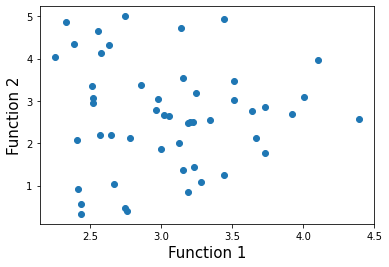

In [156]:
import matplotlib.pyplot as plt
#f1 = [i * -1 for i in function1_values]
#f2 = [j * -1 for j in function2_values]
#f1 = look[0]
#f2 = look[1]
f1 = initFobj1
f2 = initFobj2
#print(f1)
#print(f2)
#print(lookNonDom)
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
#plt.plot(f1,f2, '.b-')
plt.scatter(f2,f1)
plt.show()

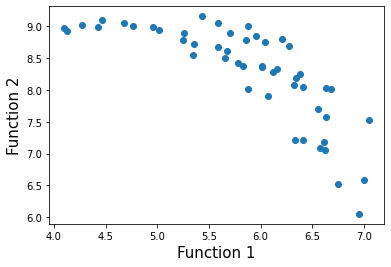

In [157]:
import matplotlib.pyplot as plt
#f1 = [i * -1 for i in function1_values]
#f2 = [j * -1 for j in function2_values]
#f1 = look[0]
#f2 = look[1]
f1 = maxFObj1
f2 = maxFObj2
#print(f1)
#print(f2)
#print(lookNonDom)
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
#plt.plot(f1,f2, '.b-')
plt.scatter(f2,f1)
plt.show()

## Animate

In [155]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation

fig, ax = plt.subplots(figsize=(5, 3))
#ax.set(xlim=(-3, 3), ylim=(-1, 1))

x = maxFObj1
y = maxFObj2

line = ax.plot(x[0], y[0], color='k', lw=2)[0]

def animate(i):
    line.set_ydata(y[i, :])

print(line)
anim = FuncAnimation(fig, animate, interval=len(x), frames=100)
print(anim)
anim.save('filename.gif', writer='imagemagick')

Line2D(_line0)


TypeError: 'MovieWriterRegistry' object is not an iterator

In [150]:
x = np.linspace(-3, 3, 91)
print(len(x))

91


## test Fast Non Dominated

In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [ ]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

In [ ]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [ ]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


In [ ]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()


In [106]:
nC = 1000
v1 = [rd.random() for x in range(nC)]
v2 = [rd.random() for x in range(nC)]

f = fast_non_dominated_sort(v1,v2)
print(f)

[[337, 460, 517, 625, 726, 769, 981], [546, 485, 737, 70, 190, 429, 111, 419], [89, 636, 802, 794, 672, 709, 105], [571, 439, 513, 616, 795, 312, 314, 578, 595, 267, 869, 504], [585, 88, 274, 966, 144, 413, 729, 736, 19, 576, 618, 78, 178, 333, 948], [670, 892, 297, 317, 551, 635, 701, 569, 17, 405, 128, 214, 810], [331, 509, 514, 880, 259, 269, 481, 949, 278, 235, 87, 165, 213, 425, 926, 265], [680, 835, 621, 192, 668, 988, 422, 491, 411, 783, 130, 276, 389, 127, 263, 507, 855, 72, 383, 547, 594, 665, 717], [396, 677, 203, 404, 605, 785, 131, 217, 482, 619, 472, 628, 75, 588, 61, 922, 678, 919, 870, 158], [520, 567, 98, 215, 441, 97, 921, 503, 528, 698, 886, 103, 539, 790, 960, 933, 182, 282, 827, 237, 837], [59, 958, 230, 313, 894, 415, 666, 260, 360, 456, 110, 505, 727, 185, 974, 80, 310, 738, 799, 889], [184, 927, 601, 290, 15, 603, 955, 344, 30, 492, 494, 807, 246, 840, 13, 336, 658, 815, 191, 11, 134, 695, 939, 822], [998, 862, 200, 637, 917, 137, 935, 159, 14, 584, 967, 891, 849

In [135]:
import matplotlib.animation as animation
from IPython.display import HTML
def _update_plot(i,fig,scat):
    scat.set_offsets(([0,i],[50,i],[100,i]))

    return scat,

fig = plt.figure()

x = [0,50,100]
y = [0,0,0]

ax = fig.add_subplot(111)
ax.grid(True, linestyle = "-",color='0.75')
ax.set_xlim([-50,200])
ax.set_ylim([-50,200])
scat = plt.scatter(x,y, c  =x)
scat.set_alpha(0.8)
anim = animation.FuncAnimation(fig, _update_plot, fargs = (fig,scat), frames = 100, interval = 100)

HTML(anim.to_html5_video())

RuntimeError: Requested MovieWriter (ffmpeg) not available

In [139]:
x = np.linspace(-3, 3, 91)
t = np.linspace(1, 25, 30)
X2, T2 = np.meshgrid(x, t)
 
sinT2 = np.sin(2*np.pi*T2/T2.max())
F = 0.9*sinT2*np.sinc(X2*(1 + sinT2))
print(len(sinT2))

30


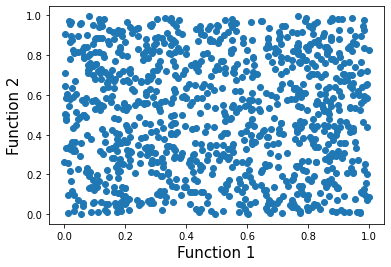

In [107]:
# sebelum 
plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1, v2)
plt.show()

In [109]:
def fast_non_dominated_sort(values1, values2):
    S=[[] for i in range(0,len(values1))]
    front = [[]]
    n=[0 for i in range(0,len(values1))]
    rank = [0 for i in range(0, len(values1))]

    for p in range(0,len(values1)):
        S[p]=[]
        n[p]=0
        for q in range(0, len(values1)):
            if (values1[p] > values1[q] and values2[p] > values2[q]) or (values1[p] >= values1[q] and values2[p] > values2[q]) or (values1[p] > values1[q] and values2[p] >= values2[q]):
                if q not in S[p]:
                    S[p].append(q)
            elif (values1[q] > values1[p] and values2[q] > values2[p]) or (values1[q] >= values1[p] and values2[q] > values2[p]) or (values1[q] > values1[p] and values2[q] >= values2[p]):
                n[p] = n[p] + 1
        if n[p]==0:
            rank[p] = 0
            if p not in front[0]:
                front[0].append(p)

    i = 0
    while(front[i] != []):
        Q=[]
        for p in front[i]:
            for q in S[p]:
                n[q] =n[q] - 1
                if( n[q]==0):
                    rank[q]=i+1
                    if q not in Q:
                        Q.append(q)
        i = i+1
        front.append(Q)

    del front[len(front)-1]
    return front


500


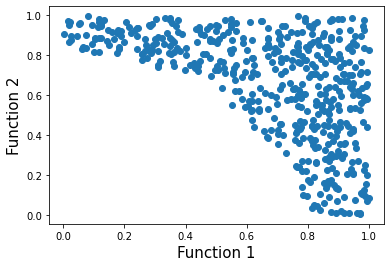

In [110]:
f_1 = f[0]
#print(v1[38])
v1New = []
v2New = []
print(int(nC/2))
for i in f :
    #print(i)
    for j in i :
        #print(v1[j])
        if len(v1New) < int(nC/2) :
            v1New.append(v1[j])
            v2New.append(v2[j])
        else :
            break

plt.xlabel('Function 1', fontsize=15)
plt.ylabel('Function 2', fontsize=15)
plt.scatter(v1New, v2New)
plt.show()
